In [8]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline
def nearest_value(array,value):
    idx=(np.abs(array-value)).argmin()
    return idx
df=pd.read_csv("demand per node.csv",index_col=range(4))
dfp=pd.read_csv("highlights per node.csv",index_col=range(2),header=range(2))

         Hermosillo                              Nacozari/Cananea              \
            DiaPico    ValorPico PromedioMensual          DiaPico   ValorPico   
Ano  Mes                                                                        
2016 1           23   618.628332      579.869514               23  158.413479   
     2           27   659.104125      610.475914               27  168.778202   
     3           25   713.961925      653.648755               25  182.825756   
     4           28   797.418859      714.833598               28  204.196752   
     5           30  1088.021654      901.236798               30  278.612031   
     6           24  1258.412437     1190.865936               24  322.244363   
     7           22  1283.134877     1110.044725               22  328.575091   
     8           28  1266.162457     1103.573967               28  324.228927   
     9            0  1246.824014     1064.408242                0  319.276890   
     10           1  1087.63

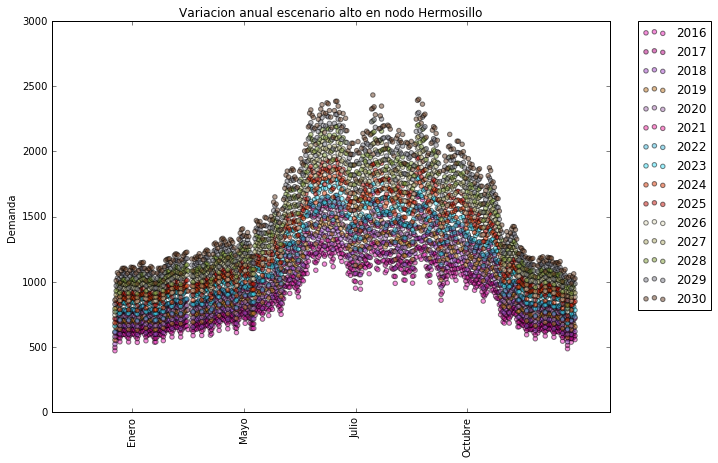

KeyboardInterrupt: 

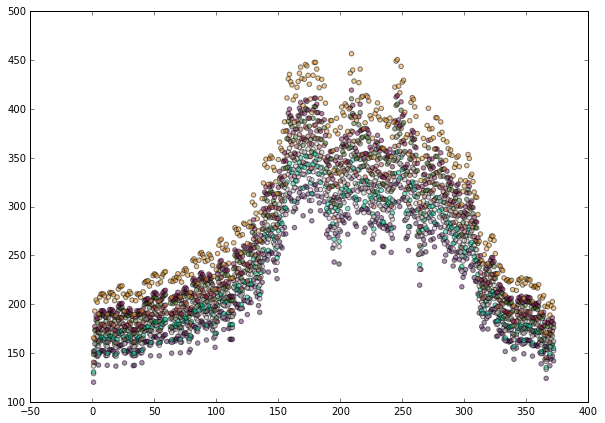

In [10]:

for index, k in enumerate(df.columns.tolist()):
    
    plt.figure(index,figsize=(10,7),dpi = 200)
    
    data1=[]
    for a in range(2016,2031):
        try: f=df.xs(a,level=0)[k]
        except ValueError: print "{0},{1},{2}".format(a,m,d)
        yy=[]
        for m in range(1,13):
            for d in range(1,32):
                try: yy.append(f.xs([m,d],level=[0,1]).mean())
                except KeyError: yy.append(0)
                
        
        color =[np.random.rand(3)]*372
        plt.scatter(range(1,373), yy, s=20, c=color, alpha=0.5,label='{0}'.format(a))
    plt.xticks([15,105,195,285], ['Enero','Mayo','Julio','Octubre'], rotation='vertical')
    name='Variacion anual escenario alto en nodo {0}'.format(k)
    plt.ylabel('Demanda')
    plt.title(name)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

Analisis horario de un un nodo determinado. Dado un nodo, ano y mes, mostrara la demanda horaria diaria todos los dias en un grafico, mientras que en otro mostrara la demanda del dia pico, un dia promedio, el dia medio y un dia aleatorio
Planta: Hermosillo
Ano: 2020
Mes: 06
Â¿Cada cuantas horas quieres que grafique?  1
DiaPico              24.000000
ValorPico          1572.980674
PromedioMensual    1487.742281
Name: (2020, 6), dtype: float64


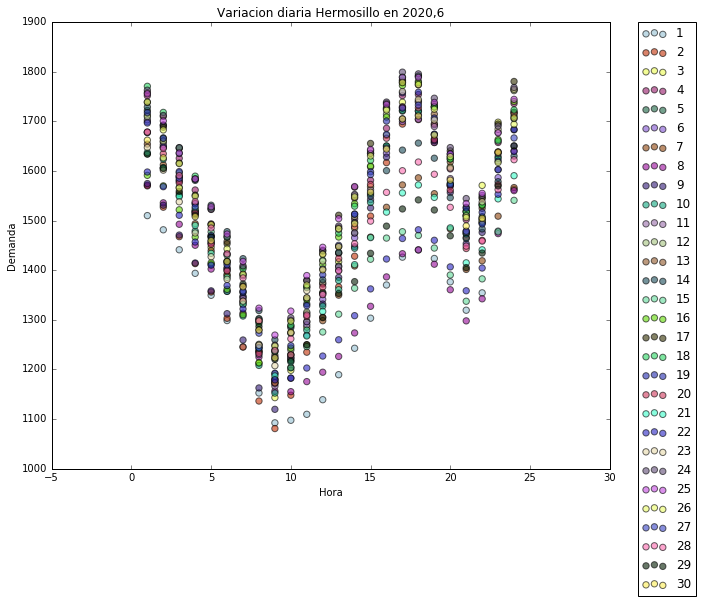

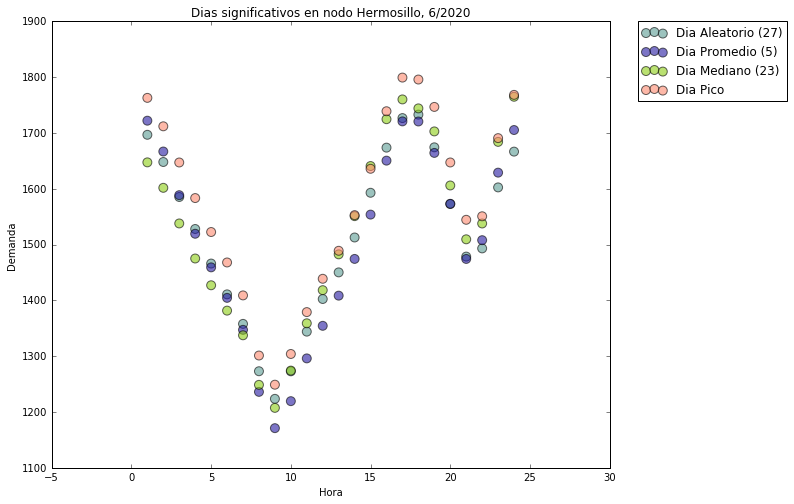

In [9]:
print "Analisis horario de un un nodo determinado. Dado un nodo, ano y mes, mostrara la demanda horaria diaria todos los dias en un grafico, mientras que en otro mostrara la demanda del dia pico, un dia promedio, el dia medio y un dia aleatorio"


k=raw_input("Planta: ")
a=int(raw_input("Ano: "))
m=int(raw_input("Mes: "))
res=int(raw_input("¿Cada cuantas horas quieres que grafique?  "))


%matplotlib inline
plt.figure(1,figsize=(10,8),dpi = 200)

for d in df.xs([a,m,1],level=[0,1,3])[k].index.tolist():
    yy=[]
    for h in range(1,25):
        yy.append(df.xs([a,m,d,h])[k])
    plt.scatter(range(1,25,res),[yy[i] for i in range(0,24,res)],s=40,c=[np.random.rand(3)]*24,alpha=.6,label='{0}'.format(d))
name='Variacion diaria {0} en {1},{2}'.format(k,a,m)
print dfp.xs([a, m])[k]
plt.ylabel('Demanda')
plt.xlabel('Hora')
plt.title(name)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



zz=[]
for d in df.xs([a,m,1],level=[0,1,3])[k].index.tolist():
    zz.append(df.xs([a,m,d],level=range(3))[k].mean())
aleatorio=random.choice(zz)
indx_ale=zz.index(aleatorio)
indx_mean= nearest_value(np.array(zz),dfp.xs([a,m])[k,'PromedioMensual'])
mean = zz[indx_mean]
if len(zz)%2 ==1:
    median = np.median(np.array(zz))
    indx_median = zz.index(median)
else:
    n=np.random.randint(len(zz))
    median = np.median(zz[-n])
    indx_median = zz.index(median)
    if indx_median>= n:
        indx_median= indx_median+1
        

plt.figure(2,figsize=(10,8),dpi = 200)
plt.scatter(range(1,25,res),[df.xs([a,m,indx_ale],level=range(3))[k].tolist()[i] for i in range(0,24,res)],s=80,c=[np.random.rand(3)]*24,alpha=.6,label="Dia Aleatorio ({0})".format(indx_ale))
plt.scatter(range(1,25,res),[df.xs([a,m,indx_mean],level=range(3))[k].tolist()[i] for i in range(0,24,res)],s=80,c=[np.random.rand(3)]*24,alpha=.6,label="Dia Promedio ({0})".format(indx_mean))
plt.scatter(range(1,25,res),[df.xs([a,m,indx_median],level=range(3))[k].tolist()[i] for i in range(0,24,res)],s=80,c=[np.random.rand(3)]*24,alpha=.6,label="Dia Mediano ({0})".format(indx_median))
plt.scatter(range(1,25,res),[df.xs([a,m,dfp.xs([a,m])[k,'DiaPico']],level=range(3))[k].tolist()[i] for i in range(0,24,res)],s=80,c=[np.random.rand(3)]*24,alpha=.6,label="Dia Pico")
plt.xlabel('Hora')
plt.ylabel('Demanda')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Dias significativos en nodo {0}, {1}/{2}'.format(k,m,a))
plt.show()